In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

plt.style.use('seaborn-pastel')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

/tmp/ipykernel_10724/650175437.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


## The Erdos-Renyi Model

In [2]:
G = nx.erdos_renyi_graph(10, 0.4, seed=42)
pos = nx.spring_layout(G, iterations=100)

## Breadth First Search

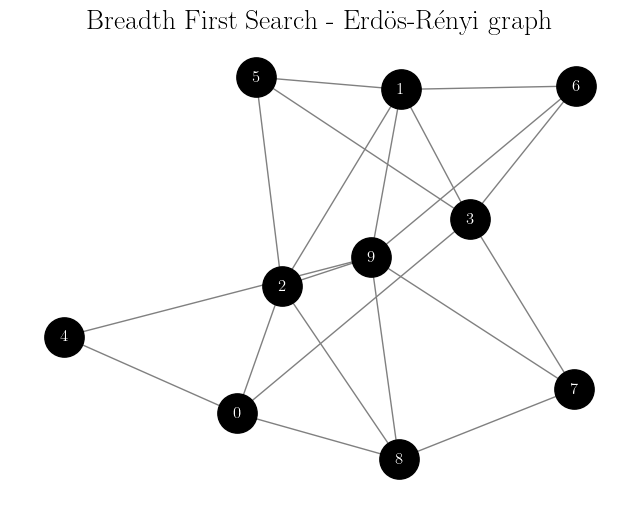

In [4]:
bfs = nx.bfs_tree(G, source=0)
nodes = list(bfs.nodes())
edges = list(bfs.edges())

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(r'Breadth First Search - Erd\"os-R\'enyi graph', fontsize=20)
ax.axis('off')

def update(i):
    ax.clear()
    ax.set_title(r'Breadth First Search - Erd\"os-R\'enyi graph', fontsize=20)
    ax.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color='black', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='white', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes[:i], node_size=800, node_color='indianred', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=edges[:i], edge_color='indianred', ax=ax)
    return ax

anim = FuncAnimation(fig, update, frames=len(nodes), interval=1000)
HTML(anim.to_html5_video())

## Depth First Search

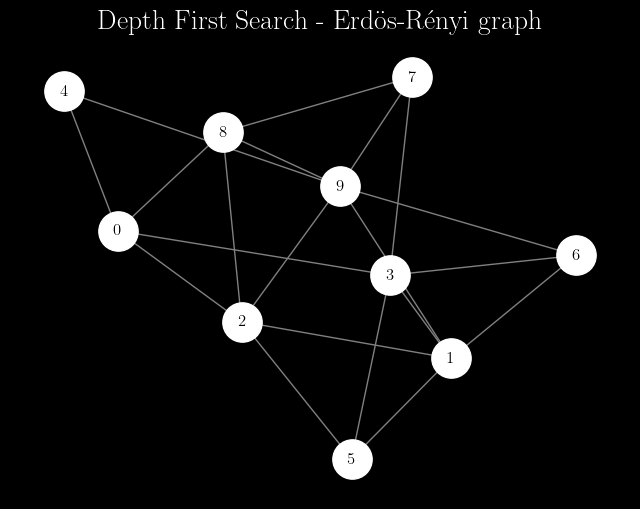

In [4]:
dfs = nx.dfs_tree(G, source=0)
nodes = list(dfs.nodes())
edges = list(dfs.edges())

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(r'Depth First Search - Erd\"os-R\'enyi graph', fontsize=20)
ax.axis('off')

def update(i):
    ax.clear()
    ax.set_title(r'Depth First Search - Erd\"os-R\'enyi graph', fontsize=20)
    ax.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color='white', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes[:i], node_size=800, node_color='indianred', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=edges[:i], edge_color='indianred', ax=ax)
    return ax

anim = FuncAnimation(fig, update, frames=len(nodes), interval=1000)
HTML(anim.to_html5_video())

## Djikstra's Algorithm

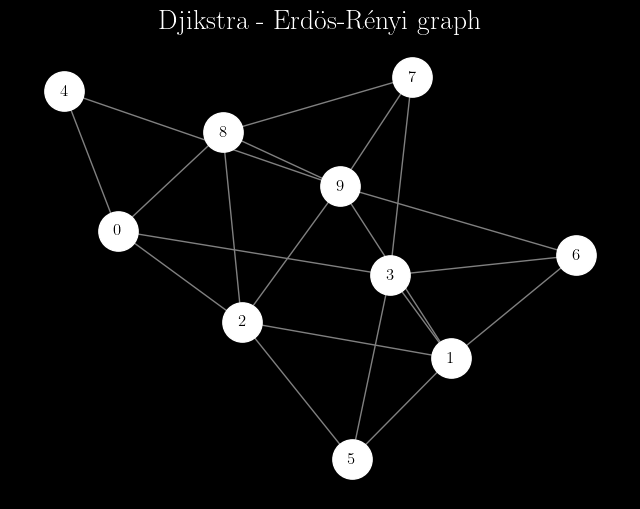

In [5]:
djk = nx.dijkstra_path(G, source=5, target=4)
nodes = djk
edges = list(zip(djk[:-1], djk[1:]))

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(r'Djikstra - Erd\"os-R\'enyi graph', fontsize=20)
ax.axis('off')

def update(i):
    ax.clear()
    ax.set_title(r'Djikstra - Erd\"os-R\'enyi graph', fontsize=20)
    ax.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color='white', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes[:i], node_size=800, node_color='indianred', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=edges[:i], edge_color='indianred', ax=ax)
    return ax

anim = FuncAnimation(fig, update, frames=len(nodes), interval=1000)
HTML(anim.to_html5_video())

## Bellman-Ford Algorithm

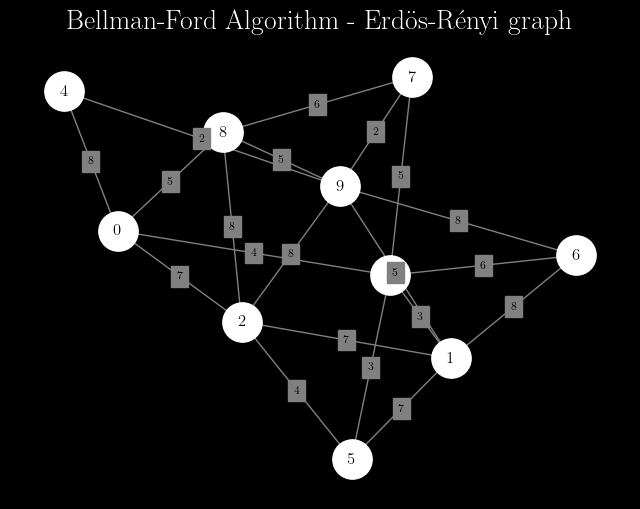

In [8]:
np.random.seed(42)

H = G
weights = np.random.randint(1, 10, size=len(G.edges()))
for i, (u, v) in enumerate(H.edges()):
    H.edges[u, v]['weight'] = weights[i]

bfa = nx.bellman_ford_path(H, source=5, target=4, weight='weight')
nodes = bfa
edges = list(zip(bfa[:-1], bfa[1:]))

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(r'Bellman-Ford Algorithm - Erd\"os-R\'enyi graph', fontsize=20)
ax.axis('off')

def update(i):
    ax.clear()
    ax.set_title(r'Bellman-Ford Algorithm - Erd\"os-R\'enyi graph', fontsize=20)
    ax.axis('off')
    nx.draw_networkx_nodes(H, pos, node_size=800, node_color='white', ax=ax)
    nx.draw_networkx_labels(H, pos, font_size=12, font_color='black', ax=ax)
    nx.draw_networkx_edges(H, pos, edge_color='gray', ax=ax)
    for u, v in H.edges():
        x = (pos[u][0] + pos[v][0]) / 2
        y = (pos[u][1] + pos[v][1]) / 2
        ax.text(x, y, H.edges[u, v]['weight'], fontsize=8, color='black', ha='center', va='center', weight='bold', backgroundcolor='gray')
    nx.draw_networkx_nodes(H, pos, nodelist=nodes[:i], node_size=800, node_color='indianred', ax=ax)
    nx.draw_networkx_edges(H, pos, edgelist=edges[:i], edge_color='indianred', ax=ax)
    return ax

anim = FuncAnimation(fig, update, frames=len(nodes), interval=1000)
HTML(anim.to_html5_video())

## Floyd-Warshall Algorithm

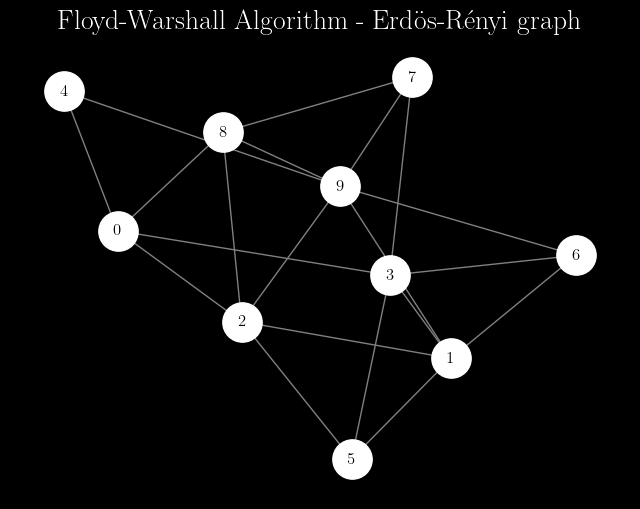

In [11]:
faa = nx.floyd_warshall(G)
nodes = list(faa.keys())
edges = []
for u in faa:
    for v in faa[u]:
        if u != v:
            edges.append((u, v))

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(r'Floyd-Warshall Algorithm - Erd\"os-R\'enyi graph', fontsize=20)
ax.axis('off')

def update(i):
    ax.clear()
    ax.set_title(r'Floyd-Warshall Algorithm - Erd\"os-R\'enyi graph', fontsize=20)
    ax.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color='white', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes[:i], node_size=800, node_color='indianred', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=edges[:i], edge_color='indianred', ax=ax)
    return ax

anim = FuncAnimation(fig, update, frames=len(nodes), interval=1000)
HTML(anim.to_html5_video())

## A* Search

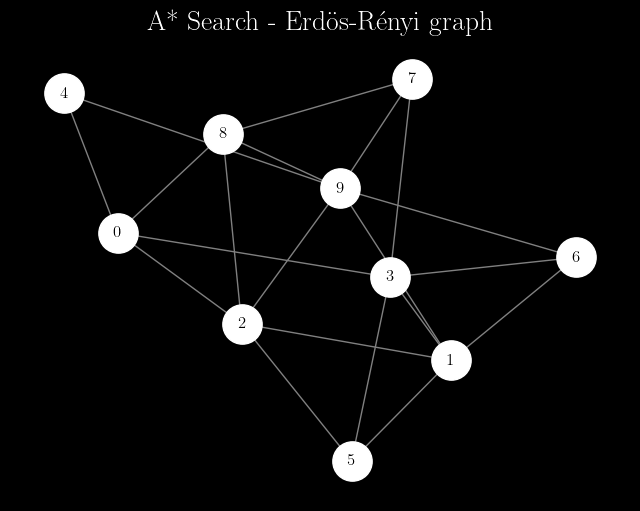

In [24]:
astar = nx.astar_path(G, source=5, target=4)
nodes = astar
edges = list(zip(astar[:-1], astar[1:]))

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(r'A* Search - Erd\"os-R\'enyi graph', fontsize=20)
ax.axis('off')

def update(i):
    ax.clear()
    ax.set_title(r'A* Search - Erd\"os-R\'enyi graph', fontsize=20)
    ax.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color='white', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='gray', ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes[:i], node_size=800, node_color='indianred', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=edges[:i], edge_color='indianred', ax=ax)
    return ax

anim = FuncAnimation(fig, update, frames=len(nodes), interval=1000)
HTML(anim.to_html5_video())